In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

In [5]:
#load datas
New = pd.read_csv('data/MHPH_new.csv')
Top = pd.read_csv('data/MHPH_top.csv')
Hot = pd.read_csv('data/MHPH_hot.csv')
All = pd.read_csv('data/MHPH.csv')

In [6]:
All.columns

Index(['title', 'num_comments', 'text', 'id', 'author', 'created_utc', 'score',
       'upvote_ratio', 'url', 'flair'],
      dtype='object')

In [7]:
#concat new and top
df_nt = pd.concat([New, Top])
len(df_nt)

1984

In [8]:
#check duplicate on new and top
df1 = df_nt.drop_duplicates(subset='id')
len(df1)

1927

In [9]:
#concat new and hot
df_nh = pd.concat([New, Hot])
len(df_nh)

1984

In [10]:
#check duplicate on new and hot
df2 = df_nh.drop_duplicates(subset='id')
len(df2)

998

In [11]:
#concat top and hot
df_th = pd.concat([Top, Hot])
len(df_th)

1996

In [12]:
#check duplicate on top and hot
df3 = df_th.drop_duplicates(subset='id')
len(df3)

1937

In [13]:
#convert to date_time
New['date_time'] = pd.to_datetime(New['created_utc'], unit='s')
Top['date_time'] = pd.to_datetime(Top['created_utc'], unit='s')
Hot['date_time'] = pd.to_datetime(Hot['created_utc'], unit='s')
All['date_time'] = pd.to_datetime(All['created_utc'], unit='s')

In [14]:
#Add date column
New['date'] = New['date_time'].dt.date
Top['date'] = Top['date_time'].dt.date
Hot['date'] = Hot['date_time'].dt.date
All['date'] = All['date_time'].dt.date


In [15]:
#add hour column
New['hour'] = (New['date_time'].dt.hour + 8) % 24
Top['hour'] = (Top['date_time'].dt.hour + 8) % 24
Hot['hour'] = (Hot['date_time'].dt.hour + 8) % 24
All['hour'] = (All['date_time'].dt.hour + 8) % 24

In [16]:
# Define the time ranges for each bin
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late Night (12AM-4AM)', 'Early Morning (4AM-8AM)', 'Morning (8AM-12PM)', 'Afternoon (12PM-4PM)', 'Evening (4PM-8PM)', 'Night (8PM-12AM)']


In [17]:
New['TOD'] = pd.cut(New['hour'], bins=bins, labels=labels, right=False)
Top['TOD'] = pd.cut(Top['hour'], bins=bins, labels=labels, right=False)
Hot['TOD'] = pd.cut(Hot['hour'], bins=bins, labels=labels, right=False)
All['TOD'] = pd.cut(All['hour'], bins=bins, labels=labels, right=False)

In [18]:
# Define a dictionary mapping to remap the hour values
hour_mapping = {0: '12AM', 1: '1AM', 2: '2AM', 3: '3AM', 4: '4AM', 5: '5AM',
                6: '6AM', 7: '7AM', 8: '8AM', 9: '9AM', 10: '10AM', 11: '11AM',
                12: '12PM', 13: '1PM', 14: '2PM', 15: '3PM', 16: '4PM', 17: '5PM',
                18: '6PM', 19: '7PM', 20: '8PM', 21: '9PM', 22: '10PM', 23: '11PM'}

In [19]:
# Map the hour values to 12hr set
New['hour_12hr'] = New['hour'].map(hour_mapping)
Top['hour_12hr'] = Top['hour'].map(hour_mapping)
Hot['hour_12hr'] = Hot['hour'].map(hour_mapping)
All['hour_12hr'] = All['hour'].map(hour_mapping)

In [20]:
#add day column
New['day'] = New['date_time'].dt.day_name()
Top['day'] = Top['date_time'].dt.day_name()
Hot['day'] = Hot['date_time'].dt.day_name()
All['day'] = All['date_time'].dt.day_name()

In [21]:
#add month column
New['month'] = New['date_time'].dt.month_name()
Top['month'] = Top['date_time'].dt.month_name()
Hot['month'] = Hot['date_time'].dt.month_name()
All['month'] = All['date_time'].dt.month_name()

In [22]:
dfs = ['New', 'Top', 'Hot', 'All']
names = [str(df) for df in dfs]

dataframes = {
    'New': New,
    'Top': Top,
    'Hot': Hot,
    'All': All
}

In [23]:
def plot_distribution_per_hour(df, name):

    # Create order
    hr_order = ['6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM',
            '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM']

    
    # Create a bar plot using Seaborn with figsize and color palette
    sns.set_style('white')
    plt.figure(figsize=(12, 3))  # Set the figure size
    sns.countplot(data=df, x='hour_12hr', color=(46/255, 139/255, 87/255), order=hr_order)  # Set the color palette

    # Add labels and title
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Distribution per Hour of {name} Post')

    # Display the plot
    plt.show()

In [24]:
hr_order = ['6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM',
            '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM']

counts = All['hour_12hr'].value_counts().reset_index()
counts.columns = ['Hour', 'Count']
counts = counts.sort_values('Hour', key=lambda x: pd.Categorical(x, categories=hr_order, ordered=True))
counts.to_csv('csv/EDA_per_hr.csv', index=False)
counts

,Hour,Count
21,6AM,39
17,7AM,56
18,8AM,53
15,9AM,75
10,10AM,89
6,11AM,105
12,12PM,80
7,1PM,100
11,2PM,81
14,3PM,77


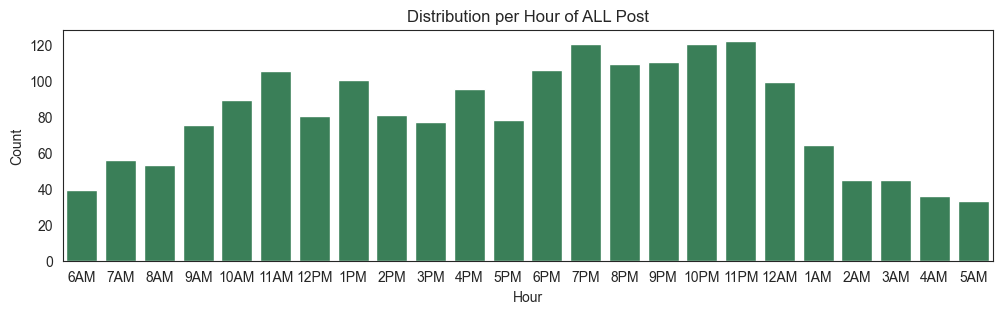

In [25]:
plot_distribution_per_hour(All, 'ALL')

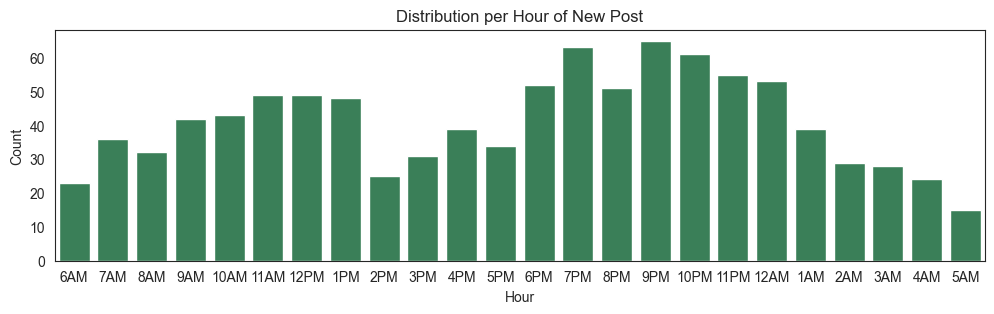

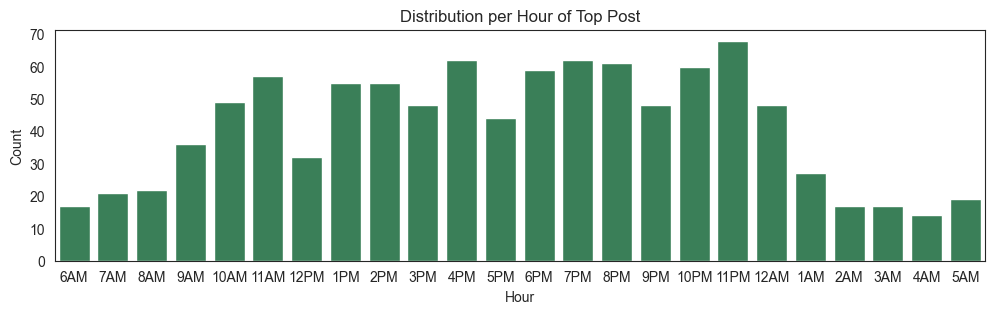

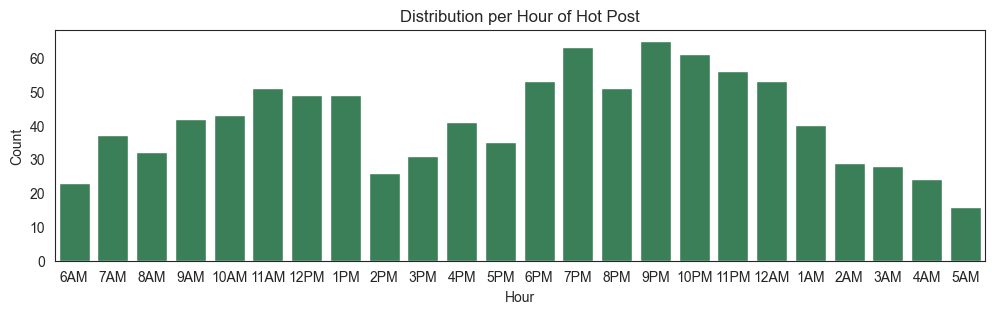

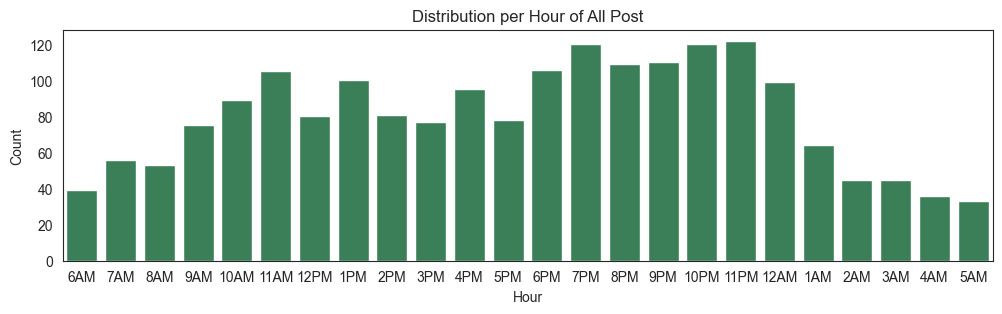

In [26]:


for df_name, name in zip(dfs, names):
    plot_distribution_per_hour(dataframes[df_name], name)

In [27]:
def plot_distribution_per_TOD(df, name):

    # Create order
    hr_order = ['Late Night (12AM-4AM)', 'Early Morning (4AM-8AM)', 'Morning (8AM-12PM)', 'Afternoon (12PM-4PM)', 'Evening (4PM-8PM)', 'Night (8PM-12AM)']

    # Create a bar plot using Seaborn with figsize and color palette
    sns.set_style('white')
    plt.figure(figsize=(12, 3))  # Set the figure size
    sns.countplot(data=df, x='TOD', color=(46/255, 139/255, 87/255), order=hr_order)  # Set the color palette

    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(f'Distribution per Part of Day of {name} Post')

    # Display the plot
    plt.show()

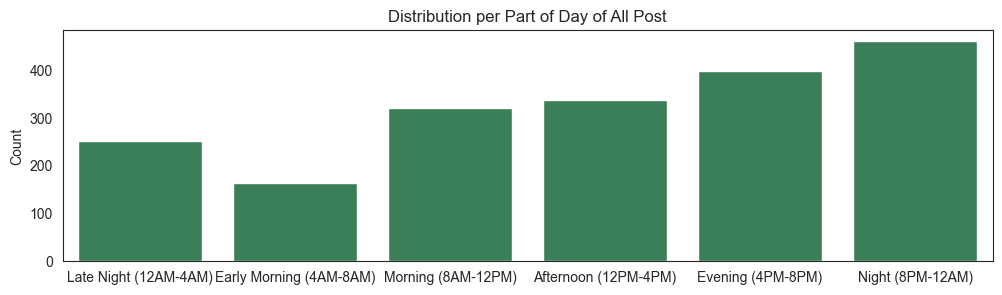

In [28]:
plot_distribution_per_TOD(All, 'All')

In [29]:
df_daily = All.copy()
df_daily.head()

,title,num_comments,text,id,author,created_utc,score,upvote_ratio,url,flair,date_time,date,hour,TOD,hour_12hr,day,month
0,Ano po ba iniinum nyong gamot sa anhedonia?,2,May anhedonia po ako 5 years na pa help po,13wevrj,PleasantGuest4207,1.685516e+09,1,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION,2023-05-31 06:59:12,2023-05-31,14,Afternoon (12PM-4PM),2PM,Wednesday,May
1,What do you do when you feel that your meds ar...,1,Basically the title :( I've been on a dose of ...,13wca6d,sagehuntress,1.685508e+09,4,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,DISCUSSION,2023-05-31 04:32:03,2023-05-31,12,Afternoon (12PM-4PM),12PM,Wednesday,May
2,Where to buy ADHD meds?,2,"Tried calling southstar, mercury, watson's tap...",13wb7pz,Electrical_Lemon640,1.685504e+09,1,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,2023-05-31 03:38:38,2023-05-31,11,Morning (8AM-12PM),11AM,Wednesday,May
3,How to overcome victim mentality? any book rec...,30,Just realized yesterday that I have victim min...,13waqsr,UneducatedGrey,1.685503e+09,3,1.00,https://www.reddit.com/r/MentalHealthPH/commen...,INFORMATION,2023-05-31 03:15:54,2023-05-31,11,Morning (8AM-12PM),11AM,Wednesday,May
4,I'm always not okay,5,Sometimes I'm okay but most of the time I'm no...,13w9wjp,lostanddehydrated,1.685501e+09,3,0.81,https://www.reddit.com/r/MentalHealthPH/commen...,TRIGGER WARNING,2023-05-31 02:36:43,2023-05-31,10,Morning (8AM-12PM),10AM,Wednesday,May


In [30]:
by_day = All.groupby('date').agg(post_count=('date', 'count'))
by_day['post_count'].mean()

2.4364779874213838

In [31]:
New['score'].max(), New['score'].min()

(225, 0)

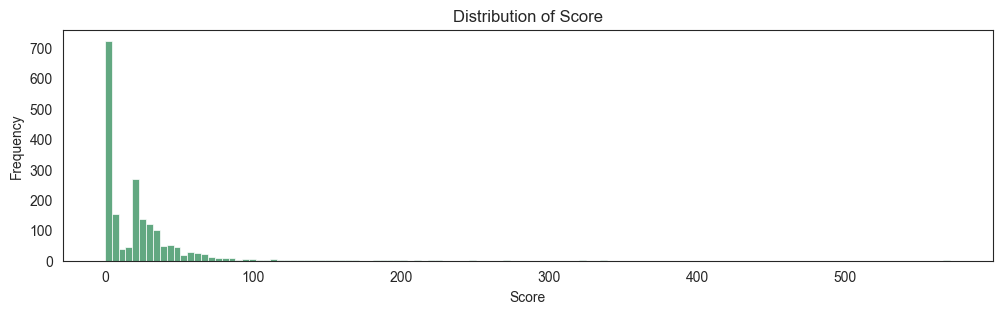

In [32]:
sns.set_style('white')
plt.figure(figsize=(12, 3))  # Set the figure size

sns.histplot(data=All, x='score', kde=False, color=(46/255, 139/255, 87/255))
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Super

In [ ]:
def plot_distribution_per_day(df_name, name):
    # Define the order of days
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Create a bar plot using Seaborn with figsize and color palette
    sns.set_style('white')
    plt.figure(figsize=(12, 3))  # Set the figure size
    sns.countplot(data=df, x='day', palette='binary', order=day_order)  # Set the color palette

    # Add labels and title
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Distribution per Day of {name} Post')

    # Display the plot
    plt.show()

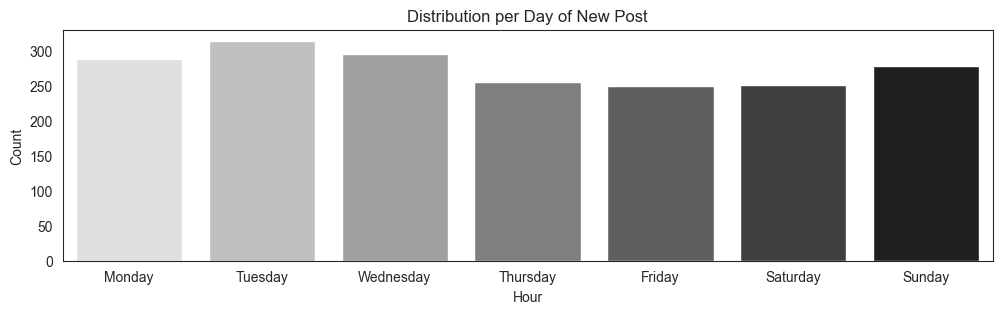

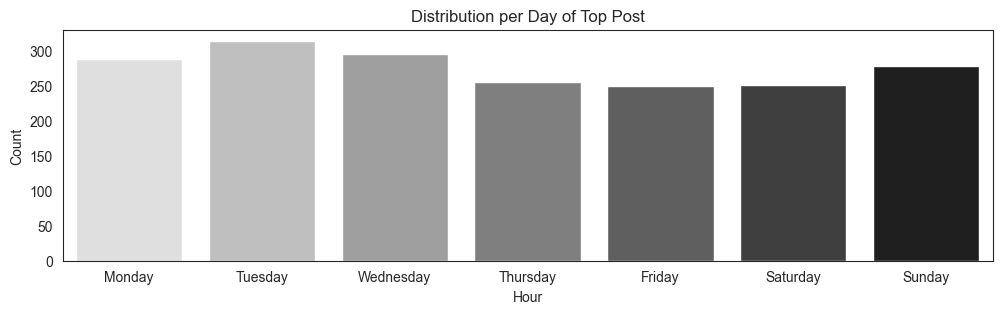

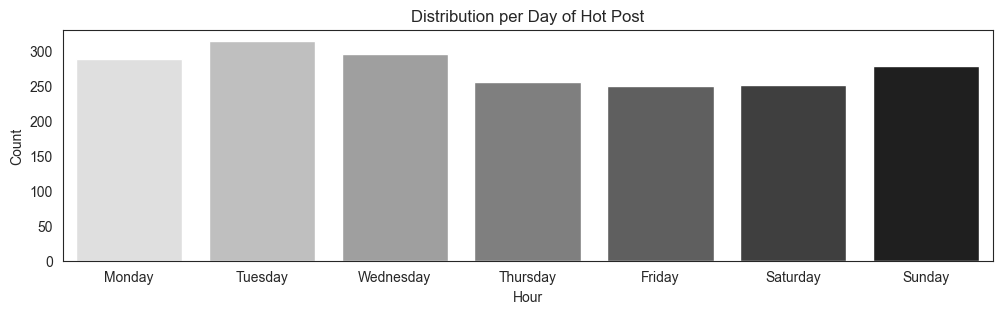

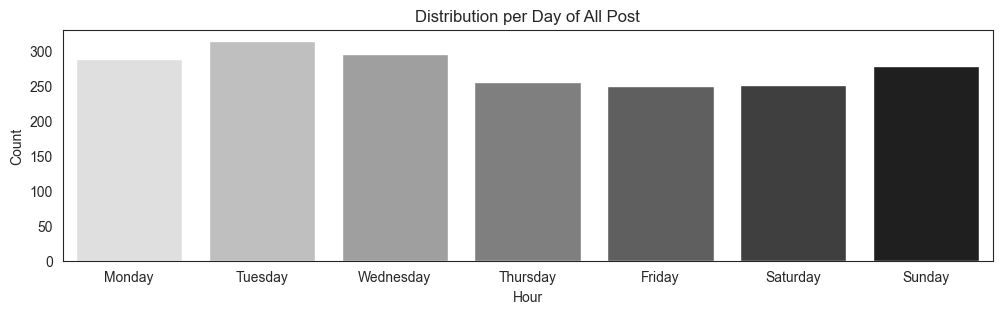

In [187]:
for df_name, name in zip(dfs, names):
    plot_distribution_per_day(dataframes[df_name], name)

In [188]:
def plot_distribution_per_month(df_name, name):
    # Define the order of days
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    # Create a bar plot using Seaborn with figsize and color palette
    sns.set_style('white')
    plt.figure(figsize=(12, 3))  # Set the figure size
    sns.countplot(data=df, x='month', palette='binary', order=month_order)  # Set the color palette

    # Add labels and title
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'Distribution per Month of {name} Post')

    # Display the plot
    plt.show()

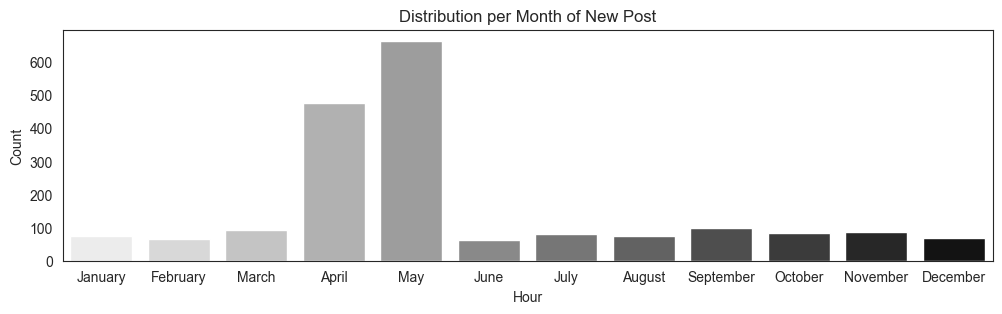

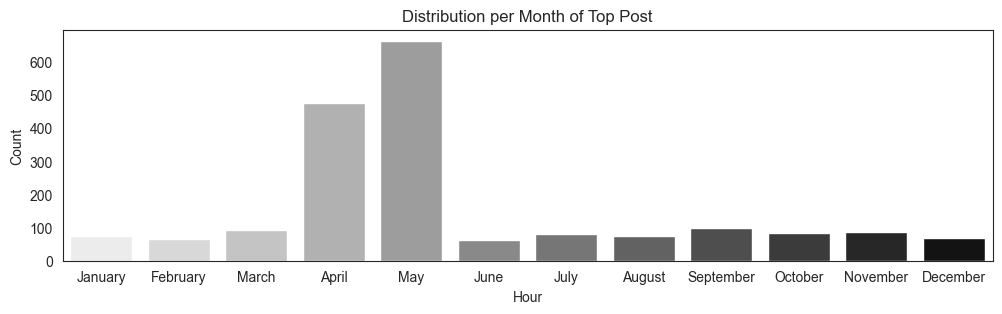

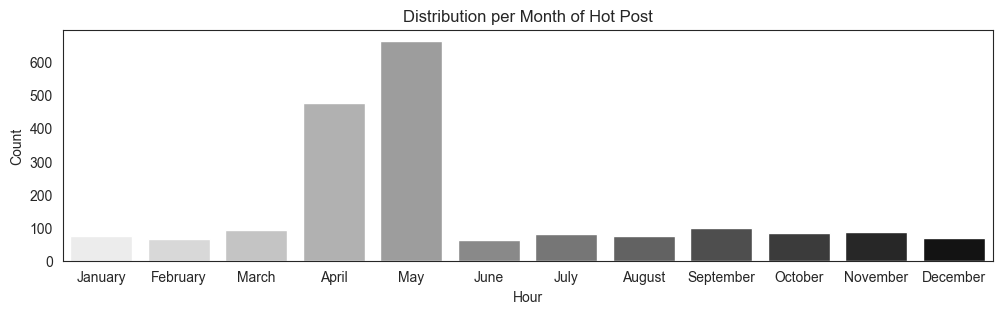

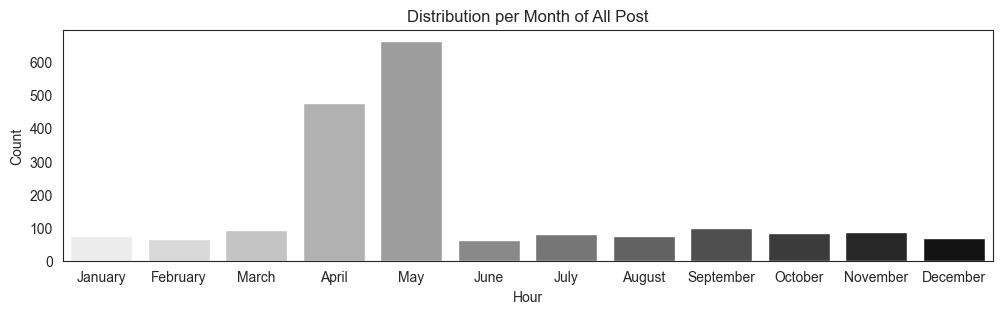

In [189]:
for df_name, name in zip(dfs, names):
    plot_distribution_per_month(dataframes[df_name], name)